mnist 데이터를 활용한 Deep Neural Network 예제
국토연구원 국토데이터랩 | 장요한 (ycanns@krihs.re.kr)
* 아래 샘플은 "모두의 인공지능 with 파이썬 (길벗)"의 예제 p.183 - p.216 을 수정하여 활용하였습니다
1. INITIALIZATION

In [ ]:
""" 
필요한 함수들을 불러오기: 
keras - 신경망 계산 가속화, 
tensorflow - 벡터행렬 및 미분 계산, 
numpy - 복잡한 산술계산,
matplotlib - 그래프 그리기
"""
# 필요한 함수 불러오기
from tensorflow.keras.models import Sequential # ANNs model
from tensorflow.keras.layers import Dense, Activation # fully-connected layer with activation function
from tensorflow.keras.utils import to_categorical # library for using Encoding
from tensorflow.keras.datasets import mnist # calling dataset
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# keras에 있는 샘플데이터(mnist) 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data() # mnist에 내제되어 있는 데이터셋의 구성대로 불러오기
# 불러온 minst 데이터가 맞게 들어왔는지 확인
print("x_train shape", x_train.shape)
print("y_train shape", y_train.shape)
print("x_test shape", x_test.shape)
print("y_test shape", y_test.shape)

11490434/11490434 [==============================] - 2s 0us/step
x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [ ]:
# data format 확인하기
x_test[0]


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

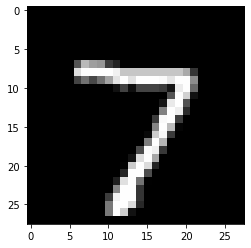

In [ ]:
# data 그림으로 확인하기 
plt.figure()
plt.imshow(x_test[0], cmap='gray')


2. DATA PRE-PROCESSING

In [ ]:
# 계산의 용이성을 위해 데이터의 형태 바꾸기 (28개의 행 -> 1행)
# 28 X 28 매트릭스 --> 1 X 784 매트릭스로 변환 (부록 B 참조)
X_train = x_train.reshape(60000,784)
X_test = x_test.reshape(10000,784)
X_train = X_train.astype('float32')  # 데이터의 정규화를 위한 형식변경
X_test = X_test.astype('float32')
X_train /=255   # 256 색 데이터의 정규화(0~1 사이의 값으로 일반화, Normalization)
X_test /=255
print("X Training matrix shape", X_train.shape) # 변환된 데이터 확인
print("X Testing matrix shape", X_test.shape)


X Training matrix shape (60000, 784)
X Testing matrix shape (10000, 784)


In [ ]:
Y_train = to_categorical(y_train, 10) # One-hot Encoding으로 입력값 일반화
Y_test = to_categorical(y_test, 10)
print("Y Training matrix shape", Y_train.shape)
print("Y Testing matrix shape", Y_test.shape)

Y Training matrix shape (60000, 10)
Y Testing matrix shape (10000, 10)


2. DESIGN ANNs ARCHITECTURE

In [ ]:
# 모형 설계하기 (부록 C 참조)
# Input(784) - Hidden_1(512) - Hidden_2(256) - Output(10) 
# Try with your own Architecture!
model = Sequential()
model.add(Dense(512, input_shape=(784,))) # 첫번째 은닉층
model.add(Activation('relu')) # 활성화 함수
model.add(Dense(256)) # 두번째은닉층
model.add(Activation('relu')) # 활성화 함수
model.add(Dense(10)) # 출력층
model.add(Activation('softmax')) # 각 뉴런에서 전달되는 값의 총 합이 1이 되도록 구성 (부록 D 참조)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 activation_1 (Activation)   (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
 activation_2 (Activation)   (None, 10)                0         
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-trai

3. RUN MODEL

In [ ]:
# 분류문제에 적합한 손실함수 설정, 오차를 줄이기 위한 방법 (adam 또는 확률적경사하강법(SGD)), 정확도비교 등
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])
# 훈련데이터에 학습 (batch_size -한번에 훈련시킬 노드 수, epochs -총반복횟수, verbose -epochs별 표시여부)
model.fit(X_train, Y_train, batch_size=128, epochs=10, verbose=1)

Epoch 1/10
469/469 [==============================] - 4s 3ms/step - loss: 1.0670 - accuracy: 0.7638
Epoch 2/10
469/469 [==============================] - 2s 4ms/step - loss: 0.4377 - accuracy: 0.8871
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3518 - accuracy: 0.9034
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 0.3128 - accuracy: 0.9130
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2872 - accuracy: 0.9196
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2679 - accuracy: 0.9247
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2519 - accuracy: 0.9287
Epoch 8/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2383 - accuracy: 0.9330
Epoch 9/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2261 - accuracy: 0.9367
Epoch 10/10
469/469 [==============================] - 1s 3ms/step - loss: 0.2158 - accuracy: 0.9395

4. CHECK MODEL ACCURACY

In [ ]:
score = model.evaluate(X_test, Y_test)
print('Test score:', score[0])
print('Test accuracy:', score[1])

313/313 [==============================] - 2s 4ms/step - loss: 0.2069 - accuracy: 0.9402
Test score: 0.20692890882492065
Test accuracy: 0.9401999711990356


5. CHECK MODEL RESUTLS

In [ ]:
# 10개의 숫자중에 가장 높은 확률을 가진 숫자값 불러오기 (부록 E 참조)
predicted_classes = np.argmax(model.predict(X_test), axis=1)
correct_indices = np.nonzero(predicted_classes == y_test)[0] # 잘 예측한 경우
incorrect_indices = np.nonzero(predicted_classes != y_test)[0] # 잘 예측하지 못한 경우

313/313 [==============================] - 1s 3ms/step


6. CHECK PLOT with GOOD RESULTS

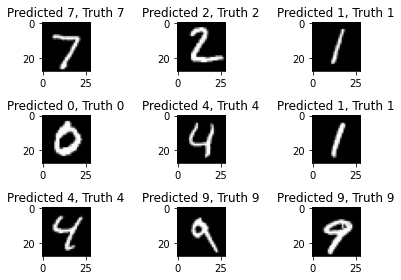

In [ ]:
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  correct = correct_indices[i]
  plt.imshow(X_test[correct].reshape(28,28), cmap='gray')
  plt.title("Predicted {}, Truth {}".format(predicted_classes[correct], y_test[correct]))
  plt.tight_layout()

7. CHECK PLOT with WRONG RESULTS

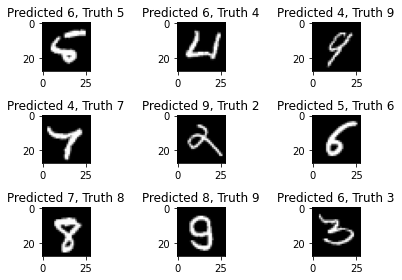

In [ ]:
plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  incorrect = incorrect_indices[i]
  plt.imshow(X_test[incorrect].reshape(28,28), cmap='gray')
  plt.title("Predicted {}, Truth {}".format(predicted_classes[incorrect], y_test[incorrect]))
  plt.tight_layout()

END code